In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [3]:
#loading model
model = tf.keras.models.load_model('./models/object_detection.h5')
print("Loaded model Successfully")



Loaded model Successfully


In [4]:
path = './test_data/N65.jpeg'
image = load_img(path) #PIL object
image = np.array(image , dtype = np.uint8)
resized_image = load_img(path , target_size=(244 , 244))
image_arr_244 = img_to_array(resized_image) / 255.0
#array is normalised above

In [5]:
#size of original image
h , w , d = image.shape
print("Height of the image : " , h)
print("Width of the image : " , w)

Height of the image :  1080
Width of the image :  1920


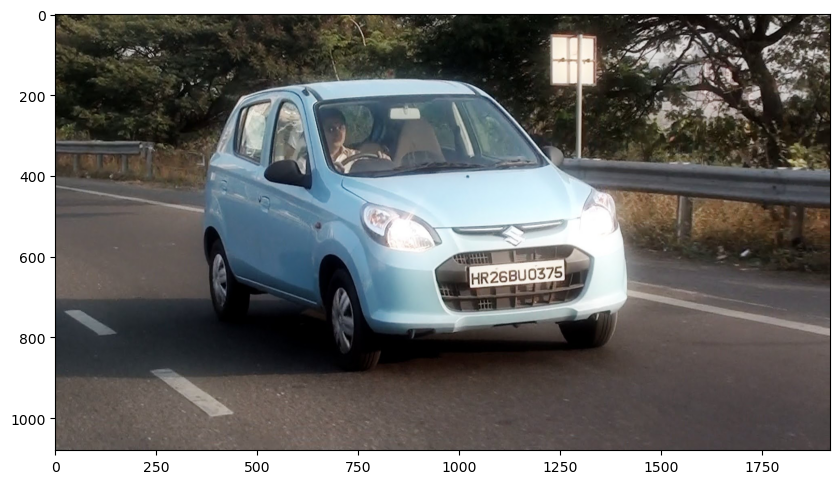

In [6]:
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_244.shape

(244, 244, 3)

In [30]:
#1 indicates the number of images
test_arr = image_arr_244.reshape(1 , 244 , 244 , 3)
test_arr.shape

(1, 244, 244, 3)

In [31]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 0s 371ms/step


array([[0.5378134 , 0.6619992 , 0.57127964, 0.63411295]], dtype=float32)

In [32]:
# denormalising the coordinates
denorm = np.array([w,w,h,h])
denormalised_coords = coords * denorm
print(denormalised_coords)

[[1032.60177612 1271.03851318  616.98201656  684.84199047]]


In [33]:
denormalised_coords = denormalised_coords.astype(np.int32)
print(denormalised_coords)

[[1032 1271  616  684]]


In [34]:
# Bounding Box on top of the image
xmin , xmax , ymin , ymax = denormalised_coords[0]
pt1 = (xmin , ymin)
pt2 = (xmax , ymax)
pt1 , pt2

((1032, 616), (1271, 684))

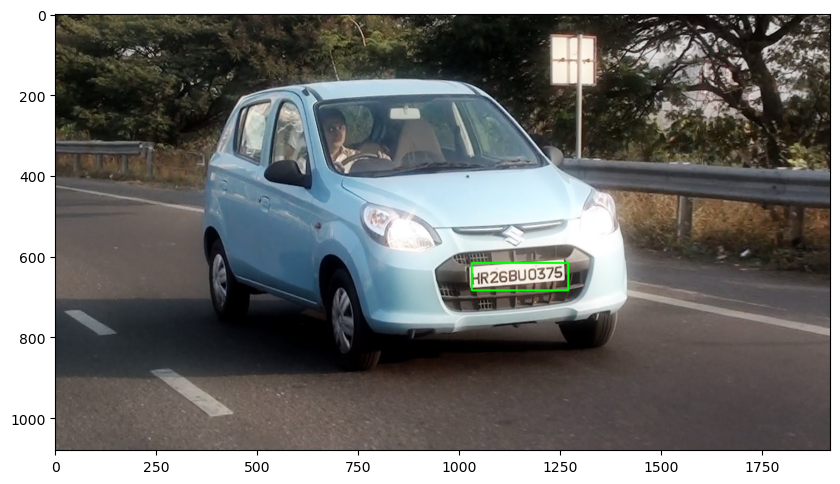

In [35]:
cv2.rectangle(image , pt1 , pt2 , (0 , 255 , 0) , 3)
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()

In [4]:
#create a pipeline
def object_detection(path):
    image = load_img(path) #PIL object
    image = np.array(image , dtype = np.uint8)
    #data preprocessing
    resized_image = load_img(path , target_size=(244 , 244))
    image_arr_244 = img_to_array(resized_image) / 255.0
    #array is normalised above
    h , w , d = image.shape
    test_arr = image_arr_244.reshape(1 , 244 , 244 , 3)
    #making predictions
    coords = model.predict(test_arr)
    denorm = np.array([w,w,h,h])
    #denormalising
    denormalised_coords = coords * denorm
    denormalised_coords = denormalised_coords.astype(np.int32)
    xmin , xmax , ymin , ymax = denormalised_coords[0]
    pt1 = (xmin , ymin)
    pt2 = (xmax , ymax)
    cv2.rectangle(image , pt1 , pt2 , (0 , 255 , 0) , 3)
    return image , denormalised_coords

1/1 [==============================] - 11s 11s/step


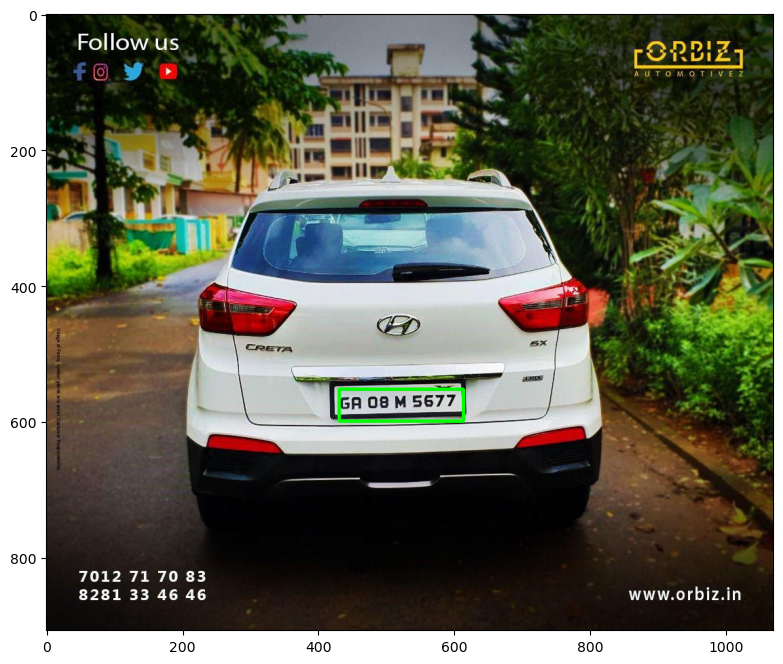

In [5]:
path = './test_data/N147.jpeg'
image , cords = object_detection(path)
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()

Optical Character Recognition

In [6]:
import pytesseract as pt

1/1 [==============================] - 0s 421ms/step


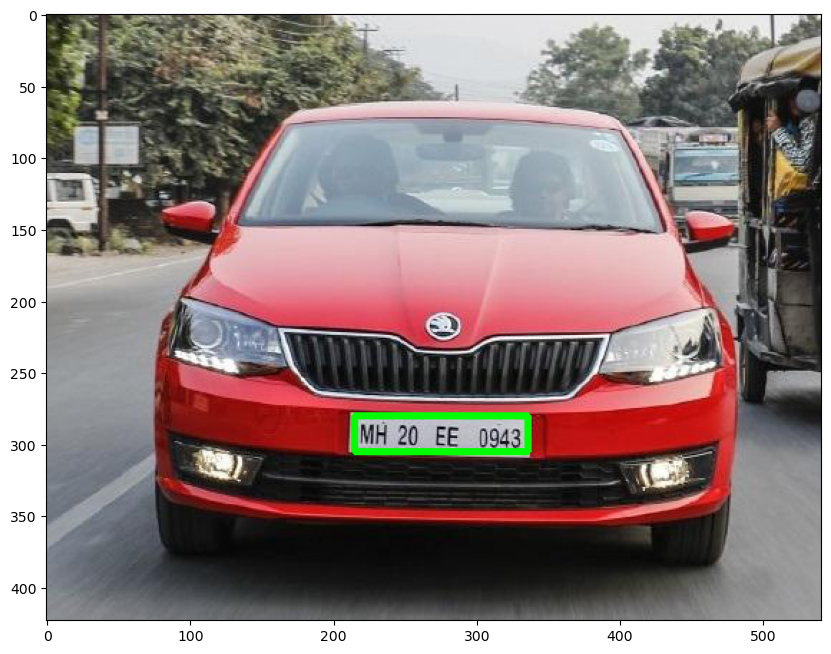

In [7]:
path = './test_data/N207.jpeg'
image , cords = object_detection(path)
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()

In [8]:
#xmin xmax ymin ymax
print(cords)
xmin , xmax , ymin , ymax = cords[0]

[[215 336 280 305]]


In [9]:
path = './test_data/N207.jpeg'
img = np.array(load_img(path))
roi = img[ymin:ymax , xmin:xmax]

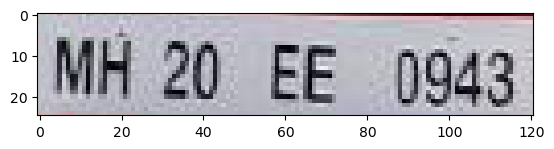

In [10]:
plt.imshow(roi)
plt.show()

In [11]:
#extracting text from the image
print(pt.image_to_string(roi))

MH 20 EE 0943



Illustrating the Need of Image preprocessing before applying OCR 

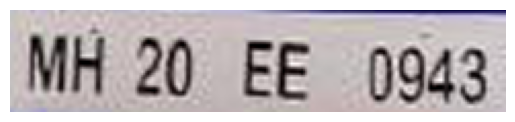

In [12]:
resize_test_license_plate = cv2.resize(roi, None, fx = 2, fy = 2,  interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

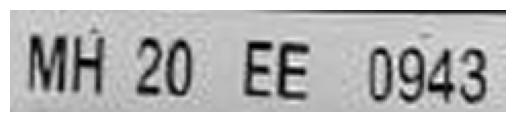

In [13]:
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY) 
plt.imshow(grayscale_resize_test_license_plate, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

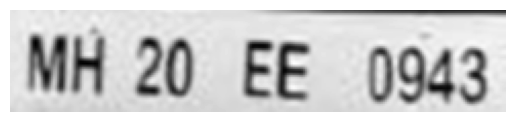

In [14]:
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0) 
plt.imshow(gaussian_blur_license_plate, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [17]:
#new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang ='eng', config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
#filter_new_predicted_result_GWT2180 = "".join(new_predicted_result.split()).replace(":", "").replace("-", "") 
print(new_predicted_result)

MH20EE0943



1/1 [==============================] - 0s 408ms/step


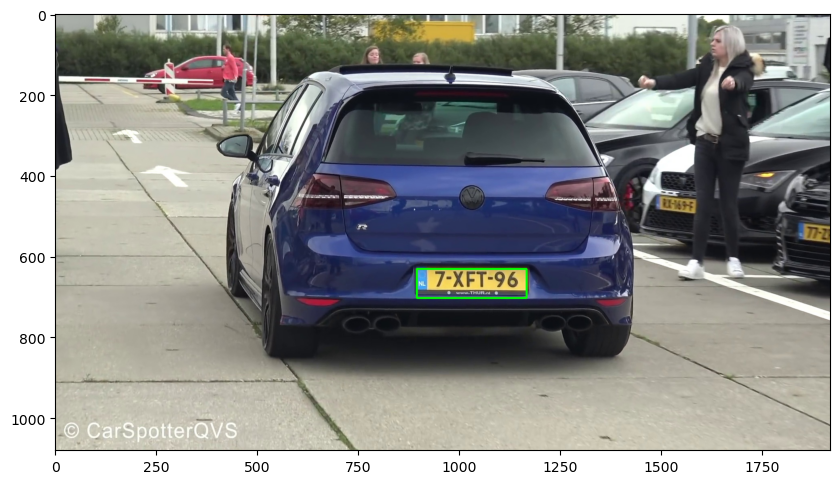

In [25]:
path = 'D:/FinalYearProject_ANPR/images/N16.jpeg'
image , cords = object_detection(path)
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()
img = np.array(load_img(path))
xmin , xmax , ymin , ymax = cords[0]
roi = img[ymin:ymax , xmin:xmax]

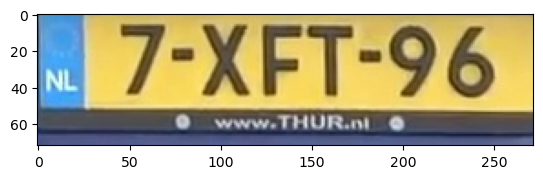

In [26]:
plt.imshow(roi)
plt.show()

In [29]:
#new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang ='eng', config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
new_predicted_result = pt.image_to_string(roi, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
#filter_new_predicted_result_GWT2180 = "".join(new_predicted_result.split()).replace(":", "").replace("-", "") 
print(new_predicted_result)

THUR



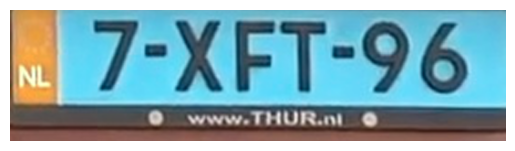

In [30]:
resize_test_license_plate = cv2.resize(roi, None, fx = 2, fy = 2,  interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

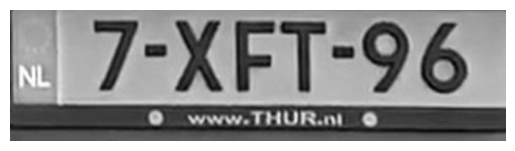

In [31]:
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY) 
plt.imshow(grayscale_resize_test_license_plate, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

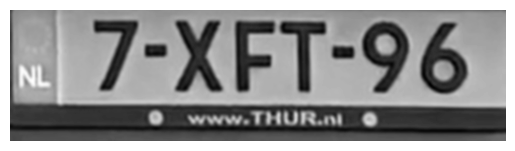

In [32]:
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0) 
plt.imshow(gaussian_blur_license_plate, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [33]:
#new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang ='eng', config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
#filter_new_predicted_result_GWT2180 = "".join(new_predicted_result.split()).replace(":", "").replace("-", "") 
print(new_predicted_result)

7XFT96



In [46]:
#Building image preprocessing pipeline
def ImagePreprocessingBeforeOCR(roi_image):
    resize_test_license_plate = cv2.resize(roi_image, None, fx = 2, fy = 2,  interpolation = cv2.INTER_CUBIC)
    grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)
    gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0) 
    plt.imshow(gaussian_blur_license_plate, cmap='gray')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    new_predicted_result = pt.image_to_string(gaussian_blur_license_plate, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    print(new_predicted_result)

1/1 [==============================] - 0s 379ms/step


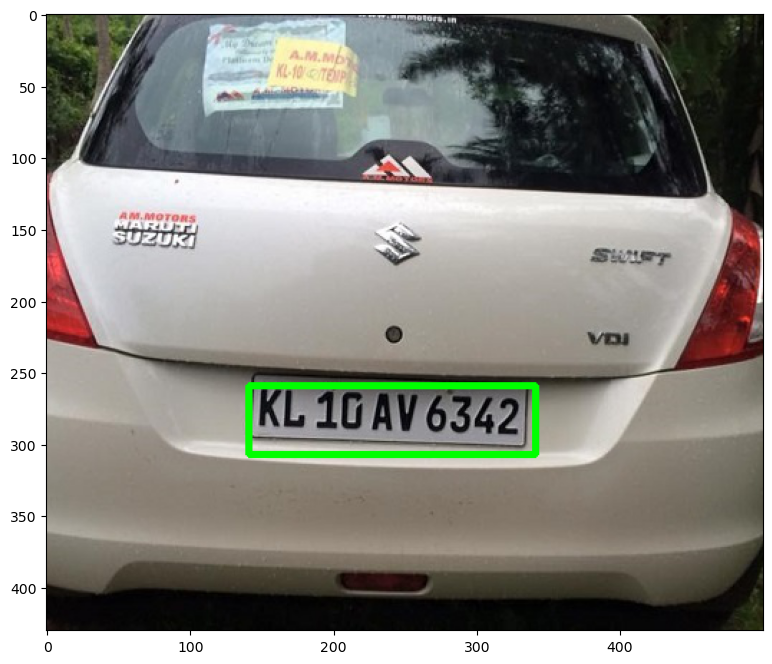

In [47]:
path = 'D:/FinalYearProject_ANPR/images/N226.jpeg'
image , cords = object_detection(path)
plt.figure(figsize=(10 , 8))
plt.imshow(image)
plt.show()

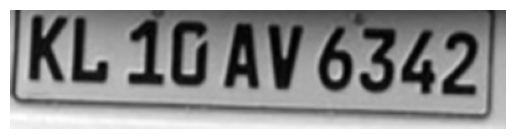

KL1GAV6342



In [48]:
#Result produced after applying preprocessing techniques
img = np.array(load_img(path))
xmin , xmax , ymin , ymax = cords[0]
roi = img[ymin:ymax , xmin:xmax]
ImagePreprocessingBeforeOCR(roi)

In [49]:
#Result without preprocessing
print(pt.image_to_string(roi))

2

